In [30]:
!pip install CFEDemands
!pip install ConsumerDemands
!pip install oauth2client
!pip install eep153_tools
!pip install dvc
!pip install gnupg

In [32]:
!pip install -r requirements.txt

# Deliverable A: Choice of Dataset

We focused on Malawi and load in the expenditure, comsumption, household characteristics, and food conversion table here. Most of these resources were found from the previous project but the fct table required extemsive additional outside research

In [40]:
InputFiles = {'Expenditures':('1-rP6IC2wm91nH94xApeLCXS7dslqlsTns9si57Hs1c0','Expenditures'),
              'malawi_consumption':('1c2rXKtnVawQ802xAh4qm5HDK9MiFTFlGZJjcgTooRVo','malawi_consumption'),
              'HH Characteristics':('1-rP6IC2wm91nH94xApeLCXS7dslqlsTns9si57Hs1c0','HH Characteristics'),
              'FCT':('13EV_loqmQzBw1q6a2RJY11HXPVqzLstRn09-phdWVKw','Codes')}

In [41]:
from eep153_tools.sheets import read_sheets
import numpy as np
import pandas as pd

def get_clean_sheet(key,sheet=None):

    dfs = read_sheets(key)

    if sheet is not None:
        df = dfs[sheet]
    else:
        df = dfs.values()[0]
        
    df.columns = [c.strip() for c in df.columns.tolist()]

    df = df.loc[:,~df.columns.duplicated(keep='first')]   

    df = df.drop([col for col in df.columns if col.startswith('Unnamed')], axis=1)

    df = df.loc[~df.index.duplicated(), :]

    return df

In [44]:
x = get_clean_sheet(InputFiles['Expenditures'][0],
                    sheet=InputFiles['Expenditures'][1])

if 'm' not in x.columns:
    x['m'] = 1

x = x.set_index(['j','t','m'])
x.columns.name = 'i'

x = x.apply(lambda x: pd.to_numeric(x,errors='coerce'))
x = x.replace(0,np.nan)

x

Key available for students@eep153.iam.gserviceaccount.com.


i                    Apple  Avocado  Banana  Bean, brown  Bean, white   Beef  \
j            t    m                                                            
10101002025  2004 1    NaN     10.0     NaN          NaN          NaN  160.0   
10101002051  2004 1    NaN      NaN     NaN          NaN          NaN    NaN   
10101002072  2004 1    NaN      5.0     5.0          NaN          NaN    NaN   
10101002079  2004 1    NaN     16.0    60.0          NaN          NaN   60.0   
10101002095  2004 1    NaN      NaN     NaN          NaN          NaN    NaN   
...                    ...      ...     ...          ...          ...    ...   
315556140342 2010 1    NaN      NaN     NaN        160.0          NaN    NaN   
315556140365 2010 1    NaN      NaN    50.0          NaN          NaN    NaN   
315556140388 2010 1    NaN      NaN     NaN          NaN          NaN    NaN   
315556140411 2010 1    NaN      NaN     NaN          NaN        225.0    NaN   
315556140434 2010 1    NaN      NaN   100.0        170.0          NaN  500.0   

i                    Biscuits  Bottled water  Bottled/ canned beer  Bread  \
j            t    m                                                         
10101002025  2004 1       NaN            NaN                   NaN    NaN   
10101002051  2004 1       NaN            NaN                   NaN    NaN   
10101002072  2004 1       NaN            NaN                   NaN    NaN   
10101002079  2004 1       NaN            NaN                   NaN    NaN   
10101002095  2004 1       NaN            NaN                   NaN    NaN   
...                       ...            ...                   ...    ...   
315556140342 2010 1       NaN            NaN                   NaN  260.0   
315556140365 2010 1       NaN            NaN                   NaN    NaN   
315556140388 2010 1       NaN            NaN                   NaN    NaN   
315556140411 2010 1       NaN            NaN                   NaN    NaN   
315556140434 2010 1       NaN            NaN                   NaN  130.0   

i                    ...  Tomato  Tomato sauce (bottle)  \
j            t    m  ...                                  
10101002025  2004 1  ...     5.0                    NaN   
10101002051  2004 1  ...     5.0                    NaN   
10101002072  2004 1  ...     NaN                    NaN   
10101002079  2004 1  ...    10.0                    NaN   
10101002095  2004 1  ...     NaN                    NaN   
...                  ...     ...                    ...   
315556140342 2010 1  ...   150.0                    NaN   
315556140365 2010 1  ...    80.0                    NaN   
315556140388 2010 1  ...    40.0                    NaN   
315556140411 2010 1  ...   100.0                    NaN   
315556140434 2010 1  ...   100.0                    NaN   

i                    Traditional beer (masase)  Wheat flour  \
j            t    m                                           
10101002025  2004 1                        NaN          NaN   
10101002051  2004 1                        NaN          NaN   
10101002072  2004 1                        NaN          NaN   
10101002079  2004 1                        NaN          NaN   
10101002095  2004 1                        NaN          NaN   
...                                        ...          ...   
315556140342 2010 1                        NaN          NaN   
315556140365 2010 1                        NaN          NaN   
315556140388 2010 1                        NaN          NaN   
315556140411 2010 1                        NaN          NaN   
315556140434 2010 1                        NaN          NaN   

i                    White sweet potato  Wild fruit (masau, mlambe, etc.)  \
j            t    m                                                         
10101002025  2004 1                 NaN                               NaN   
10101002051  2004 1                 NaN                               NaN   
10101002072  2004 1                 NaN                      

In [45]:
# Get HH characteristics...
z = get_clean_sheet(InputFiles['HH Characteristics'][0],
                    sheet=InputFiles['HH Characteristics'][1])

if 'm' not in z.columns:
    z['m'] = 1

z = z.set_index(['j','t','m'])
z.columns.name = 'k'

z = z.apply(lambda x: pd.to_numeric(x,errors='coerce'))

z

Key available for students@eep153.iam.gserviceaccount.com.


k                    M 0-3  M 4-8  M 9-13  M 14-18  M 19-30  M 31-50  M 51+  \
j            t    m                                                           
10101002025  2004 1      1      0       1        1        0        1      0   
10101002051  2004 1      0      0       0        0        1        0      0   
10101002072  2004 1      1      1       0        1        0        1      0   
10101002079  2004 1      0      1       0        0        0        1      0   
10101002095  2004 1      0      0       2        0        1        0      0   
...                    ...    ...     ...      ...      ...      ...    ...   
315556140342 2010 1      1      0       0        0        1        0      0   
315556140365 2010 1      0      0       0        0        0        1      0   
315556140388 2010 1      0      0       0        0        1        0      0   
315556140411 2010 1      1      0       0        0        2        0      0   
315556140434 2010 1      0      0       0        1        0        1      0   

k                    F 0-3  F 4-8  F 9-13  F 14-18  F 19-30  F 31-50  F 51+  
j            t    m                                                          
10101002025  2004 1      1      1       0        0        0        1      0  
10101002051  2004 1      1      0       0        1        0        0      0  
10101002072  2004 1      1      0       0        0        1        0      0  
10101002079  2004 1      2      1       0        0        0        1      0  
10101002095  2004 1      0      2       0        0        1        0      0  
...                    ...    ...     ...      ...      ...      ...    ...  
315556140342 2010 1      0      0       0        0        1        0      0  
315556140365 2010 1      0      0       0        0        0        1      0  
315556140388 2010 1      0      0       0        1        0        0      0  
315556140411 2010 1      1      0       0        0        1        0      0  
315556140434 2010 1      0      0       2        0        2        1      0  

[23551 rows x 14 columns]

In [46]:
z_adj = (z[(z['M 0-3']!= 0) | (z['F 0-3'] != 0) | (z['M 4-8'] != 0) | (z['F 4-8'] != 0)])
z_adj

k                    M 0-3  M 4-8  M 9-13  M 14-18  M 19-30  M 31-50  M 51+  \
j            t    m                                                           
10101002025  2004 1      1      0       1        1        0        1      0   
10101002051  2004 1      0      0       0        0        1        0      0   
10101002072  2004 1      1      1       0        1        0        1      0   
10101002079  2004 1      0      1       0        0        0        1      0   
10101002095  2004 1      0      0       2        0        1        0      0   
...                    ...    ...     ...      ...      ...      ...    ...   
315556140159 2010 1      0      0       0        0        0        1      0   
315556140205 2010 1      0      0       0        0        0        1      0   
315556140297 2010 1      0      0       1        0        0        1      0   
315556140342 2010 1      1      0       0        0        1        0      0   
315556140411 2010 1      1      0       0        0        2        0      0   

k                    F 0-3  F 4-8  F 9-13  F 14-18  F 19-30  F 31-50  F 51+  
j            t    m                                                          
10101002025  2004 1      1      1       0        0        0        1      0  
10101002051  2004 1      1      0       0        1        0        0      0  
10101002072  2004 1      1      0       0        0        1        0      0  
10101002079  2004 1      2      1       0        0        0        1      0  
10101002095  2004 1      0      2       0        0        1        0      0  
...                    ...    ...     ...      ...      ...      ...    ...  
315556140159 2010 1      0      1       2        0        1        0      0  
315556140205 2010 1      1      0       0        0        1        0      0  
315556140297 2010 1      1      1       0        0        1        0      0  
315556140342 2010 1      0      0       0        0        1        0      0  
315556140411 2010 1      1      0       0        0        1        0      0  

[16504 rows x 14 columns]

In [47]:
q = get_clean_sheet(InputFiles['malawi_consumption'][0],
                    sheet=InputFiles['malawi_consumption'][1])

if 'm' not in q.columns:
    q['m'] = 1

q = q.set_index(['j','t','m','u'])
q.columns.name = 'i'

q = q.apply(lambda x: pd.to_numeric(x,errors='coerce'))
q = q.replace(0,np.nan)

q

Key available for students@eep153.iam.gserviceaccount.com.


i                              Apple  Avocado  Banana  Bean, brown  \
j           t    m u                                                 
10101002025 2004 1 Gram          NaN      NaN     NaN          NaN   
                   Kg            NaN      NaN     NaN          NaN   
                   Millilitre    NaN      NaN     NaN          NaN   
                   Piece         NaN      2.0     NaN          NaN   
10101002051 2004 1 Gram          NaN      NaN     NaN          NaN   
...                              ...      ...     ...          ...   
31202086364 2004 1 Kg            NaN      NaN     NaN          NaN   
                   Millilitre    NaN      NaN     NaN          NaN   
                   Piece         NaN      NaN     NaN          NaN   
31202086374 2004 1 Kg            NaN      NaN     NaN          NaN   
                   Piece         NaN      NaN     NaN          NaN   

i                              Bean, white  Beef  Biscuits  Bottled water  \
j           t    m u                                                        
10101002025 2004 1 Gram                NaN   NaN       NaN            NaN   
                   Kg                  NaN   2.0       NaN            NaN   
                   Millilitre          NaN   NaN       NaN            NaN   
                   Piece               NaN   NaN       NaN            NaN   
10101002051 2004 1 Gram                NaN   NaN       NaN            NaN   
...                                    ...   ...       ...            ...   
31202086364 2004 1 Kg                  NaN   NaN       NaN            NaN   
                   Millilitre          NaN   NaN       NaN            NaN   
                   Piece               NaN   NaN       NaN            NaN   
31202086374 2004 1 Kg                  NaN   NaN       NaN            NaN   
                   Piece               NaN   NaN       NaN            NaN   

i                              Bottled/ canned beer  Bread  ...  Tomato  \
j           t    m u                                        ...           
10101002025 2004 1 Gram                         NaN    NaN  ...     NaN   
                   Kg                           NaN    NaN  ...     NaN   
                   Millilitre                   NaN    NaN  ...     NaN   
                   Piece                        NaN    NaN  ...     5.0   
10101002051 2004 1 Gram                         NaN    NaN  ...     NaN   
...                                             ...    ...  ...     ...   
31202086364 2004 1 Kg                           NaN    NaN  ...     NaN   
                   Millilitre                   NaN    NaN  ...     NaN   
                   Piece                        NaN    NaN  ...    15.0   
31202086374 2004 1 Kg                           NaN    NaN  ...     NaN   
                   Piece                        NaN    NaN  ...     7.0   

i                              Tomato sauce (bottle)  \
j           t    m u                                   
10101002025 2004 1 Gram                          NaN   
                   Kg                            NaN   
                   Millilitre                    NaN   
                   Piece                         NaN   
10101002051 2004 1 Gram                          NaN   
...                                              ...   
31202086364 2004 1 Kg                            NaN   
                   Millilitre                    NaN   
                   Piece                         NaN   
31202086374 2004 1 Kg                            NaN   
                   Piece                         NaN   

i                              Traditional beer (masase)  Wheat flour  \
j           t    m u                                                    
10101002025 2004 1 Gram                              NaN          NaN   
                   Kg                                NaN          NaN   
                   Millilitre                        NaN          NaN   
                 

# Deliverable A: Estimate Demand System

In [48]:
import sys
import cfe

y = np.log(x)
y
result = cfe.Result(y=y,z=z)

In [49]:
result.get_reduced_form()

In [50]:
result.delta.to_dataframe().unstack('k')

delta                      \
k                                             M 0-3     M 4-8    M 9-13   
i                                                                         
Avocado                                   -0.027469  0.036233 -0.003036   
Banana                                    -0.094776 -0.079738  0.054585   
Bean, brown                                0.033756  0.058986  0.062206   
Bean, white                                0.088998  0.050373  0.097664   
Beef                                      -0.098905  0.033595  0.060964   
Biscuits                                  -0.224607 -0.173919  0.092814   
Bread                                     -0.065294 -0.004541  0.059943   
Buns, scones                               0.045246  0.120182  0.113218   
Cabbage                                    0.014356  0.015227  0.079775   
Cassava tubers                             0.027358  0.048204  0.101075   
Chicken                                   -0.109181  0.007102  0.016048   
Chinese cabbage                            0.103933 -0.009215  0.075137   
Chips (vendor)                            -0.054027 -0.069796  0.035470   
Citrus, naartje, orange, etc.              0.005910 -0.110700  0.039455   
Cooking oil                               -0.099341 -0.079330  0.009946   
Dried fish                                -0.008991  0.006457  0.023662   
Eggs                                      -0.056172 -0.002189  0.055644   
Freezes (flavoured ice)                    0.126634  0.058527 -0.054907   
Fresh fish                                -0.121088 -0.049693 -0.031192   
Fresh milk                                -0.073576 -0.040439  0.057022   
Goat                                      -0.007920 -0.012172  0.109584   
Green maize                               -0.058496  0.010045  0.122148   
Groundnut                                 -0.028979 -0.001292  0.052138   
Groundnut flour                           -0.048324 -0.047073 -0.018861   
Irish potato                              -0.091835 -0.061779  0.038687   
Maize - boiled or roasted                 -0.041780  0.024351  0.097697   
Maize ufa mgaiwa (normal flour)            0.064310  0.112515  0.041167   
Maize ufa refined (fine flour)             0.018110  0.063524  0.142145   
Mandazi, doughnut (vendor)                 0.046214  0.009386  0.062543   
Meat (vendor)                             -0.004185  0.053168 -0.023871   
Meat eaten at restaurant                  -0.280654 -0.132582  0.000111   
Nkwani                                     0.031160  0.033066  0.047762   
Okra / Therere                             0.014872 -0.055624  0.051188   
Onion                                     -0.091255 -0.071492  0.024967   
Orange sweet potato                        0.161137  0.019499  0.062452   
Pork                                      -0.011009 -0.006449  0.131056   
Powdered milk                             -0.256034 -0.050838 -0.001133   
Rice                                      -0.039716 -0.001724  0.017940   
Salt                                       0.003369  0.010418  0.082138   
Samosa (vendor)                           -0.247947  0.056758 -0.128120   
Soft drinks (coca cola, fanta)            -0.100256 -0.027790 -0.008544   
Sugar                                      0.064521  0.044586  0.073426   
Sugar cane                                 0.081139  0.010243  0.090556   
Sweets, candy, chocolates                 -0.290199 -0.086628 -0.118559   
Tanaposi rape                              0.042259  0.039258  0.050717   
Tea                                       -0.084797 -0.006682  0.072521   
Tomato                                    -0.100691 -0.075390  0.004835   
White sweet potato                         0.046810  0.057825  0.181314   
Yeast, baking powder, bicarbonate of soda -0.110725 -0.072785  0.022043   

                                                                         \
k                                           M 14-18   M 19-30   M 31-5

In [51]:
result.a.to_dataframe().unstack('i')

a                                                        \
i        Avocado    Banana Bean, brown Bean, white      Beef  Biscuits   
t    m                                                                   
2004 1  2.732589  2.553386    3.563498    3.480738  4.906085  2.736930   
2010 1  3.709544  3.873656    4.573519    4.511708  5.846323  3.824394   

                                                        ...                  \
i          Bread Buns, scones   Cabbage Cassava tubers  ... Samosa (vendor)   
t    m                                                  ...                   
2004 1  4.330692     3.272087  2.821576       2.735024  ...        2.692764   
2010 1  5.089198     4.234627  3.772250       3.782887  ...        3.680945   

                                                            \
i      Soft drinks (coca cola, fanta)     Sugar Sugar cane   
t    m                                                       
2004 1                       4.026075  3.647259   2.475238   
2010 1                       4.758748  4.549718   3.376966   

                                                                    \
i      Sweets, candy, chocolates Tanaposi rape       Tea    Tomato   
t    m                                                               
2004 1                  1.879936      2.486638  2.237929  3.439653   
2010 1                  3.224241      3.538246  2.994732  4.361938   

                                                                     
i      White sweet potato Yeast, baking powder, bicarbonate of soda  
t    m                                                               
2004 1           2.985221                                  1.016818  
2010 1           4.048783                                  2.198148  

[2 rows x 49 columns]

In [52]:
result.get_beta(as_df=True)

i
Avocado                                      0.383249
Banana                                       0.598940
Bean, brown                                  0.192255
Bean, white                                  0.232248
Beef                                         0.365007
Biscuits                                     0.816535
Bread                                        0.360046
Buns, scones                                 0.303703
Cabbage                                      0.259849
Cassava tubers                               0.286150
Chicken                                      0.276638
Chinese cabbage                              0.313419
Chips (vendor)                               0.352606
Citrus, naartje, orange, etc.                0.648388
Cooking oil                                  0.591433
Dried fish                                   0.369809
Eggs                                         0.357952
Freezes (flavoured ice)                      0.561462
Fresh fish                

In [53]:
result.get_alpha(as_df = True)

i
Avocado                                      2.732589
Banana                                       2.553386
Bean, brown                                  3.563498
Bean, white                                  3.480738
Beef                                         4.906085
Biscuits                                     2.736930
Bread                                        4.330692
Buns, scones                                 3.272087
Cabbage                                      2.821576
Cassava tubers                               2.735024
Chicken                                      5.382624
Chinese cabbage                              2.325482
Chips (vendor)                               3.575587
Citrus, naartje, orange, etc.                2.329459
Cooking oil                                  3.783886
Dried fish                                   3.677535
Eggs                                         3.874567
Freezes (flavoured ice)                      1.836321
Fresh fish                

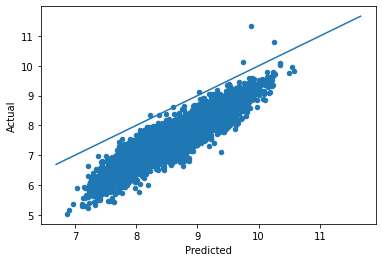

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

xbar = np.exp(result.y).sum(['m','i']).to_dataframe('xbar').replace(0,np.nan).squeeze()
xhat = result.get_predicted_expenditures().sum(['m','i']).to_dataframe('xhat').replace(0,np.nan).squeeze()

# Make dataframe of actual & predicted
df = pd.DataFrame({'Actual':np.log(xbar),'Predicted':np.log(xhat)})

df.plot.scatter(x='Predicted',y='Actual')

# Add 45 degree line
v = plt.axis()
vmin = np.max([v[0],v[2]])
vmax = np.max([v[1],v[3]])
plt.plot([vmin,vmax],[vmin,vmax])

In [55]:
result.to_dataset('malawi.ds')

<xarray.Dataset>
Dimensions:           (j: 23551, i: 49, k: 14, t: 2, m: 1, kp: 14)
Coordinates:
  * j                 (j) int64 10101002025 10101002051 ... 315556140434
  * t                 (t) int64 2004 2010
  * m                 (m) int64 1
  * i                 (i) object 'Avocado' ... 'Yeast, baking powder, bicarbo...
  * k                 (k) <U7 'M 0-3' 'M 4-8' 'M 9-13' ... 'F 31-50' 'F 51+'
  * kp                (kp) <U7 'M 0-3' 'M 4-8' 'M 9-13' ... 'F 31-50' 'F 51+'
Data variables: (12/20)
    alpha             (i) float64 2.733 2.553 3.563 3.481 ... 3.44 2.985 1.017
    beta              (i) float64 0.3832 0.5989 0.1923 ... 0.5876 0.215 0.4303
    delta             (k, i) float64 -0.02747 -0.09478 0.03376 ... 0.1424 0.2584
    prices            object None
    characteristics   (k, j, t, m) float64 1.0 nan 0.0 nan ... nan 0.0 nan 0.0
    loglambdas        (j, t, m) float64 nan nan nan nan nan ... nan nan nan nan
    ...                ...
    se_beta           object None
    se_alpha          (i) float64 0.04403 0.02459 0.01747 ... 0.02794 0.04379
    se_a              (i, t, m) float64 0.04403 0.04426 0.02459 ... 0.04379 0.03
    y                 (i, j, t, m) float64 nan nan nan nan ... nan nan nan nan
    logp              object None
    z                 (k, j, t, m) float64 1.0 nan 0.0 nan ... nan 0.0 nan 0.0

4. Infer Prices

In [56]:
# Estimates most things (not counting std errors for betas).
xhat = result.get_predicted_expenditures(as_df = True) 
result.get_beta(as_df=True).sort_values(ascending=False).tail(30)

i
Rice                               0.385456
Avocado                            0.383249
Groundnut flour                    0.374055
Dried fish                         0.369809
Beef                               0.365007
Bread                              0.360046
Eggs                               0.357952
Tea                                0.354066
Chips (vendor)                     0.352606
Okra / Therere                     0.349072
Tanaposi rape                      0.322396
Mandazi, doughnut (vendor)         0.320827
Sugar cane                         0.320151
Goat                               0.318212
Maize - boiled or roasted          0.314049
Chinese cabbage                    0.313419
Buns, scones                       0.303703
Cassava tubers                     0.286150
Chicken                            0.276638
Green maize                        0.273208
Salt                               0.267673
Orange sweet potato                0.262067
Cabbage                       

In [57]:
phat = xhat/q
# Keep kgs; g
phat = phat.groupby(['t','m']).median().T.dropna(how='all')
result['prices'] = phat.stack().to_xarray().to_array()
# Make this persistent...
result.to_dataset('./foo.ds')

<xarray.Dataset>
Dimensions:           (j: 23551, i: 49, k: 14, variable: 2, m: 1, t: 2, kp: 14)
Coordinates:
  * j                 (j) int64 10101002025 10101002051 ... 315556140434
  * t                 (t) int64 2004 2010
  * m                 (m) int64 1
  * i                 (i) object 'Avocado' ... 'Yeast, baking powder, bicarbo...
  * k                 (k) <U7 'M 0-3' 'M 4-8' 'M 9-13' ... 'F 31-50' 'F 51+'
  * kp                (kp) <U7 'M 0-3' 'M 4-8' 'M 9-13' ... 'F 31-50' 'F 51+'
  * variable          (variable) int64 2004 2010
Data variables: (12/20)
    alpha             (i) float64 2.733 2.553 3.563 3.481 ... 3.44 2.985 1.017
    beta              (i) float64 0.3832 0.5989 0.1923 ... 0.5876 0.215 0.4303
    delta             (k, i) float64 -0.02747 -0.09478 0.03376 ... 0.1424 0.2584
    prices            (variable, i, m) float64 9.351 2.308 49.78 ... nan nan nan
    characteristics   (k, j, t, m) float64 1.0 nan 0.0 nan ... nan 0.0 nan 0.0
    loglambdas        (j, t, m) float64 nan nan nan nan nan ... nan nan nan nan
    ...                ...
    se_beta           object None
    se_alpha          (i) float64 0.04403 0.02459 0.01747 ... 0.02794 0.04379
    se_a              (i, t, m) float64 0.04403 0.04426 0.02459 ... 0.04379 0.03
    y                 (i, j, t, m) float64 nan nan nan nan ... nan nan nan nan
    logp              object None
    z                 (k, j, t, m) float64 1.0 nan 0.0 nan ... nan 0.0 nan 0.0

5. Predicting Positive Consumption

In [58]:
zeros_r = cfe.Result(y=(0.+(np.exp(result.y)>0)),z=result.z)
weights = zeros_r.get_predicted_log_expenditures()

# Truncate to make weights live in [0,1]
weights = weights.where((weights<1) + np.isnan(weights),1).where((weights>0) + np.isnan(weights),0)

xbar = np.exp(result.y).sum(['m','i']).to_dataframe('xbar').replace(0,np.nan).squeeze()

# Calculate *expected* predicted expenditures, to make unconditional on being positive
xhat = (weights*result.get_predicted_expenditures())
xsum = xhat.sum(['m','i']).to_dataframe('xhat').replace(0,np.nan).squeeze()

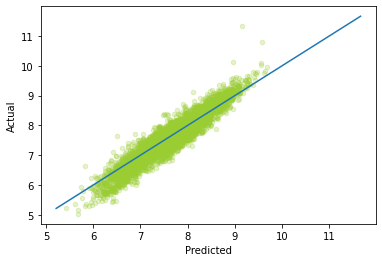

In [59]:
# Make dataframe of actual & predicted
df = pd.DataFrame({'Actual':np.log(xbar),'Predicted':np.log(xsum)})

df.plot.scatter(x='Predicted',y='Actual', c = "yellowgreen", alpha = 0.25)

# Add 45 degree line
v = plt.axis()
vmin = np.max([v[0],v[2]])
vmax = np.max([v[1],v[3]])
plt.plot([vmin,vmax],[vmin,vmax])

In [60]:
xx = result.get_predicted_expenditures() 
xhatdf = xx.to_dataset('i').to_dataframe()
xhatdf.columns.name ='i'

qhat = xhatdf.div(phat.T,axis=1)

qhat

i                    Avocado  Banana  Bean, brown  Bean, white  Beef  \
t    m j                                                               
2004 1 10101002025       NaN     NaN          NaN          NaN   NaN   
       10101002051       NaN     NaN          NaN          NaN   NaN   
       10101002072       NaN     NaN          NaN          NaN   NaN   
       10101002079       NaN     NaN          NaN          NaN   NaN   
       10101002095       NaN     NaN          NaN          NaN   NaN   
...                      ...     ...          ...          ...   ...   
2010 1 315556140342      NaN     NaN          NaN          NaN   NaN   
       315556140365      NaN     NaN          NaN          NaN   NaN   
       315556140388      NaN     NaN          NaN          NaN   NaN   
       315556140411      NaN     NaN          NaN          NaN   NaN   
       315556140434      NaN     NaN          NaN          NaN   NaN   

i                    Biscuits  Bread  Buns, scones  Cabbage  Cassava tubers  \
t    m j                                                                      
2004 1 10101002025        NaN    NaN           NaN      NaN             NaN   
       10101002051        NaN    NaN           NaN      NaN             NaN   
       10101002072        NaN    NaN           NaN      NaN             NaN   
       10101002079        NaN    NaN           NaN      NaN             NaN   
       10101002095        NaN    NaN           NaN      NaN             NaN   
...                       ...    ...           ...      ...             ...   
2010 1 315556140342       NaN    NaN           NaN      NaN             NaN   
       315556140365       NaN    NaN           NaN      NaN             NaN   
       315556140388       NaN    NaN           NaN      NaN             NaN   
       315556140411       NaN    NaN           NaN      NaN             NaN   
       315556140434       NaN    NaN           NaN      NaN             NaN   

i                    ...  Samosa (vendor)  Soft drinks (coca cola, fanta)  \
t    m j             ...                                                    
2004 1 10101002025   ...              NaN                             NaN   
       10101002051   ...              NaN                             NaN   
       10101002072   ...              NaN                             NaN   
       10101002079   ...              NaN                             NaN   
       10101002095   ...              NaN                             NaN   
...                  ...              ...                             ...   
2010 1 315556140342  ...              NaN                             NaN   
       315556140365  ...              NaN                             NaN   
       315556140388  ...              NaN                             NaN   
       315556140411  ...              NaN                             NaN   
       315556140434  ...              NaN                             NaN   

i                    Sugar  Sugar cane  Sweets, candy, chocolates  \
t    m j                                                            
2004 1 10101002025     NaN         NaN                        NaN   
       10101002051     NaN         NaN                        NaN   
       10101002072     NaN         NaN                        NaN   
       10101002079     NaN         NaN                        NaN   
       10101002095     NaN         NaN                        NaN   
...                    ...         ...                        ...   
2010 1 315556140342    NaN         NaN                        NaN   
       315556140365    NaN         NaN                        NaN   
       315556140388    NaN         NaN                        NaN   
       315556140411    NaN         NaN                        NaN   
       315556140434    NaN         NaN                        NaN   

i                    Tanaposi rape  Tea  Tomato  White sweet potato  \
t    m j                                                        

In [61]:
qhat.to_csv('qhat.csv')

# Deliverable A: Construct Nutrient System

In [62]:
# Get FCT table for foods found in results
fct = get_clean_sheet(InputFiles['FCT'][0],sheet=InputFiles['FCT'][1])
fct.index.name = 'i'
foods = fct['Food description']
fct = fct.apply(lambda x: pd.to_numeric(x,errors='coerce'))
fct['Food description'] = foods
fct=fct.set_index('Food description')

Key available for students@eep153.iam.gserviceaccount.com.


In [63]:
#get cleaned quantities table
foods = result.i.to_dataframe()
q_clean = q.dropna(axis=0,thresh = 8)
nutrients = fct[fct.index.isin(list(foods.index.values))]
q_items = q_clean.loc[:,list(foods.index.values)]
q_items['Sum'] = q_items.sum(axis=1)
q_items = q_items[q_items['Sum']>0]
q_items = q_items.drop('Sum',axis=1)
q_items.head()

i                         Avocado  Banana  Bean, brown  Bean, white  Beef  \
j           t    m u                                                        
10101003013 2004 1 Piece      1.0    15.0          NaN          NaN   NaN   
10101003017 2004 1 Piece      3.0     NaN          NaN          NaN   NaN   
10101003020 2004 1 Piece      2.0     NaN          NaN          NaN   NaN   
10101003062 2004 1 Piece     10.0    60.0          NaN          NaN   NaN   
10101010165 2004 1 Piece      6.0    18.0          NaN          NaN   NaN   

i                         Biscuits  Bread  Buns, scones  Cabbage  \
j           t    m u                                               
10101003013 2004 1 Piece       NaN    NaN           NaN      1.0   
10101003017 2004 1 Piece       NaN    NaN           NaN      NaN   
10101003020 2004 1 Piece       NaN    NaN           NaN      1.0   
10101003062 2004 1 Piece       NaN    NaN           NaN      2.0   
10101010165 2004 1 Piece       NaN    NaN           NaN      NaN   

i                         Cassava tubers  ...  Samosa (vendor)  \
j           t    m u                      ...                    
10101003013 2004 1 Piece             NaN  ...              NaN   
10101003017 2004 1 Piece             NaN  ...              NaN   
10101003020 2004 1 Piece             NaN  ...              NaN   
10101003062 2004 1 Piece             NaN  ...              NaN   
10101010165 2004 1 Piece            20.0  ...              NaN   

i                         Soft drinks (coca cola, fanta)  Sugar  Sugar cane  \
j           t    m u                                                          
10101003013 2004 1 Piece                             NaN    NaN         4.0   
10101003017 2004 1 Piece                             7.0    NaN         7.0   
10101003020 2004 1 Piece                             NaN    NaN         2.0   
10101003062 2004 1 Piece                             NaN    NaN         6.0   
10101010165 2004 1 Piece                             NaN    NaN         NaN   

i                         Sweets, candy, chocolates  Tanaposi rape  Tea  \
j           t    m u                                                      
10101003013 2004 1 Piece                        NaN            NaN  NaN   
10101003017 2004 1 Piece                        NaN            NaN  NaN   
10101003020 2004 1 Piece                        NaN            NaN  NaN   
10101003062 2004 1 Piece                        NaN            NaN  NaN   
10101010165 2004 1 Piece                        NaN            NaN  NaN   

i                         Tomato  White sweet potato  \
j           t    m u                                   
10101003013 2004 1 Piece     8.0                 NaN   
10101003017 2004 1 Piece    18.0                 NaN   
10101003020 2004 1 Piece    10.0                 NaN   
10101003062 2004 1 Piece    10.0                 NaN   
10101010165 2004 1 Piece    14.0                 NaN   

i                         Yeast, baking powder, bicarbonate of soda  
j           t    m u                                                 
10101003013 2004 1 Piece                                        NaN  
10101003017 2004 1 Piece                                        NaN  
10101003020 2004 1 Piece                                        NaN  
10101003062 2004 1 Piece                                        NaN  
10101010165 2004 1 Piece                                        NaN  

[5 rows x 49 columns]

In [64]:
#Map quantities and nutrients
fct = fct[fct.index.isin(list(q_items.columns))]

In [65]:
def actual_con(row):
    total_nut = np.zeros(11)
    for j in range(len(row)):
        nut = np.array(np.zeros(11))
        if row[j] > 0:
            nut= (fct.loc[q_items.columns[j]].array * int(row[j]))
        total_nut = total_nut + nut[0:11]
        nutrients = pd.DataFrame(total_nut,index=fct.columns)
    for i in range(1,len(q_items)):
        for j in range(len(row)):
            nut = np.array(np.zeros(11))
            if q_items.iloc[i][j] > 0:
                nut= (fct.loc[q_items.columns[j]].array * int(q_items.iloc[i][j]))
            total_nut = total_nut + nut[0:11]
            nutrients[i] = total_nut
        
    return nutrients

In [66]:
x = actual_con(q_items.iloc[0])

/tmp/ipykernel_24/3151377.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  nutrients[i] = total_nut


# Deliverable A: Nutritional Challenges and Policy Goals

In order to inform our policy-making and research we conducted additional analysis on the data and results found to see what specific areas we should focus on. 

In [67]:
diet_req = pd.read_csv("dietary_req.csv").drop(['Source'],axis=1)
dietreq = diet_req.set_index('Nutrition')
dietreq.iloc[len(dietreq)-1,:] = dietreq.iloc[len(dietreq)-1,:] * -1
diet_req = diet_req[diet_req['Nutrition'].isin(['Energy','Protein','Calcium, Ca','Iron, Fe', 'Magnesium, Mg','Vitamin A, RAE','Vitamin B-12','Vitamin B-6','Vitamin C, total ascorbic acid','Zinc, Zn','Vitamin E (alpha-tocopherol)'])]

In [68]:
#Definition functions
def return_household(row):
    household = np.array([])
    for j in range(len(row)):
        if row[j]==1:
            if (row.index[j] !='M 0-3') & (row.index[j] !='F 0-3'):
                household = np.append(household,row.index[j])
    return household

def return_nutrition(household):
    nut_pd = pd.DataFrame(np.array(np.zeros(len(diet_req['Nutrition']))),index=diet_req['Nutrition'])
    for i in range(len(household)): 
        req = diet_req.loc[:,household[i]]
        nut_pd['Person'+ str(i)] = req.to_list()
    nut_pd['Sum'] = nut_pd.sum(axis=1)
    return nut_pd[['Sum']]

In [69]:
y = pd.DataFrame()
for i in range(len(q_items)):
    y[i] = return_nutrition(return_household(z.iloc[i]))
y

/tmp/ipykernel_24/2673995432.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  y[i] = return_nutrition(return_household(z.iloc[i]))


0       1       2       3       4     \
Nutrition                                                                
Energy                          9200.0  4200.0  7800.0  6600.0  4400.0   
Protein                          207.0   102.0   173.0   140.0   102.0   
Calcium, Ca                     5600.0  2300.0  4300.0  4000.0  2000.0   
Iron, Fe                          55.0    23.0    47.0    46.0    26.0   
Magnesium, Mg                   1520.0   760.0  1270.0  1000.0   710.0   
Vitamin A, RAE                  3500.0  1600.0  2900.0  2400.0  1600.0   
Vitamin B-12                      10.2     4.8     8.4     7.2     4.8   
Vitamin B-6                        5.5     2.5     4.5     3.8     2.6   
Vitamin C, total ascorbic acid   310.0   155.0   265.0   215.0   165.0   
Vitamin E (alpha-tocopherol)      63.0    30.0    52.0    44.0    30.0   
Zinc, Zn                          43.0    20.0    35.0    29.0    19.0   

                                  5       6       7       8       9     ...  \
Nutrition                                                               ...   
Energy                          4200.0  9000.0  4200.0  7200.0  5400.0  ...   
Protein                          102.0   207.0   102.0   155.0   136.0  ...   
Calcium, Ca                     2300.0  5600.0  2300.0  4300.0  3500.0  ...   
Iron, Fe                          23.0    55.0    23.0    44.0    24.0  ...   
Magnesium, Mg                    760.0  1520.0   760.0  1100.0   980.0  ...   
Vitamin A, RAE                  1600.0  3500.0  1600.0  2600.0  2200.0  ...   
Vitamin B-12                       4.8    10.2     4.8     7.8     6.6  ...   
Vitamin B-6                        2.5     5.5     2.5     4.2     3.8  ...   
Vitamin C, total ascorbic acid   155.0   310.0   155.0   235.0   210.0  ...   
Vitamin E (alpha-tocopherol)      30.0    63.0    30.0    48.0    41.0  ...   
Zinc, Zn                          20.0    43.0    20.0    32.0    27.0  ...   

                                  1462    1463    1464    1465    1466  \
Nutrition                                                                
Energy                          4200.0  8600.0  4400.0  4200.0  6600.0   
Protein                          102.0   189.0   102.0   102.0   158.0   
Calcium, Ca                     2000.0  5600.0  2000.0  2300.0  3000.0   
Iron, Fe                          26.0    52.0    26.0    23.0    34.0   
Magnesium, Mg                    730.0  1350.0   710.0   760.0  1130.0   
Vitamin A, RAE                  1600.0  3200.0  1600.0  1600.0  2500.0   
Vitamin B-12                       4.8     9.6     4.8     4.8     7.2   
Vitamin B-6                        2.6     5.2     2.6     2.5     3.9   
Vitamin C, total ascorbic acid   165.0   280.0   165.0   155.0   255.0   
Vitamin E (alpha-tocopherol)      30.0    59.0    30.0    30.0    45.0   
Zinc, Zn                          19.0    40.0    19.0    20.0    30.0   

                                  1467    1468     1469    1470    1471  
Nutrition                                                                
Energy                          6800.0  2200.0  11000.0  7000.0  8400.0  
Protein                          151.0    56.0    241.0   155.0   204.0  
Calcium, Ca                     4600.0  1000.0   6900.0  4300.0  4300.0  
Iron, Fe                          47.0     8.0     63.0    44.0    49.0  
Magnesium, Mg                   1100.0   420.0   1750.0  1100.0  1490.0  
Vitamin A, RAE                  2600.0   900.0   4100.0  2600.0  3200.0  
Vitamin B-12                       7.8     2.4     12.0     7.8     9.6  
Vitamin B-6                        4.2     1.3      6.5     4.2     5.1  
Vitamin C, total ascorbic acid   220.0    90.0    355.0   235.0   320.0  
Vitamin E (alpha-tocopherol)      48.0    15.0     74.0    48.0    60.0  
Zinc, Zn                          32.0    11.0     51.0    32.0    39.0  

[11 rows x 1472 columns]

In [70]:
x.head()

0        1         2         3         4         5     \
energy kcal  3056.00  9832.92  13646.92  34711.92  41993.92  51579.92   
protein        66.30   343.05    516.63   1048.81   1157.71   1912.75   
vit a         204.80   731.20    883.90   2709.30   2974.10  46592.10   
vit e           8.72    40.14       NaN       NaN       NaN       NaN   
vit c         443.90  1365.70       NaN       NaN       NaN       NaN   

                 6         7         8         9     ...         1462  \
energy kcal  58116.92  63852.92  74613.92  85887.92  ...  32099411.48   
protein       2600.85   3203.15   4407.15   5868.85  ...   1774552.08   
vit a        52440.00  57428.60  63642.20  81439.40  ...   3570449.10   
vit e             NaN       NaN       NaN       NaN  ...          NaN   
vit c             NaN       NaN       NaN       NaN  ...          NaN   

                    1463         1464         1465         1466         1467  \
energy kcal  32104797.48  32114744.48  32125916.48  32132400.48  32140238.48   
protein       1774641.18   1775220.38   1775508.58   1775795.98   1776119.98   
vit a         3570911.50   3572046.40   3572689.40   3573362.60   3573773.20   
vit e                NaN          NaN          NaN          NaN          NaN   
vit c                NaN          NaN          NaN          NaN          NaN   

                    1468         1469         1470         1471  
energy kcal  32149575.48  32161775.60  32173551.60  32178285.60  
protein       1776463.08   1776736.18   1777941.18   1778052.18  
vit a         3574151.00   3574419.60   3575002.00   3575433.00  
vit e                NaN          NaN          NaN          NaN  
vit c                NaN          NaN          NaN          NaN  

[5 rows x 1472 columns]

We started off by looking at iron to understand the iron content in foods as based on outside research this is a commonly deficient nutrient.

In [71]:
nutrients[['fe']].sort_values('fe',ascending=False)

fe
Food description                                 
Nkwani                                     131.70
Tanaposi rape                               30.80
Bean, brown                                  8.80
Bean, white                                  8.80
Tomato                                       8.70
Meat (vendor)                                8.00
Powdered milk                                6.00
Eggs                                         5.90
Groundnut flour                              4.60
Okra / Therere                               4.40
Cabbage                                      3.60
Maize ufa refined (fine flour)               3.50
Maize ufa mgaiwa (normal flour)              3.50
Maize - boiled or roasted                    3.50
Samosa (vendor)                              2.70
Sweets, candy, chocolates                    2.50
Beef                                         2.50
Meat eaten at restaurant                     2.40
Groundnut                                    2.10
Mandazi, doughnut (vendor)                   2.00
Goat                                         1.70
Biscuits                                     1.70
Dried fish                                   1.40
Buns, scones                                 1.20
Chips (vendor)                               1.00
Chicken                                      1.00
Fresh fish                                   0.90
Pork                                         0.80
Avocado                                      0.70
Rice                                         0.60
Sugar cane                                   0.60
Green maize                                  0.50
Bread                                        0.50
Orange sweet potato                          0.40
White sweet potato                           0.40
Irish potato                                 0.40
Banana                                       0.30
Chinese cabbage                              0.30
Cassava tubers                               0.30
Onion                                        0.20
Soft drinks (coca cola, fanta)               0.11
Citrus, naartje, orange, etc.                0.10
Salt                                         0.10
Sugar                                        0.10
Tea                                          0.00
Cooking oil                                  0.00
Freezes (flavoured ice)                      0.00
Fresh milk                                   0.00
Yeast, baking powder, bicarbonate of soda    0.00

In [72]:
sum_ar = np.array([])
for i in range(q_items.shape[1]):
    sum_ar = np.append(sum_ar,np.sum(q_items.iloc[i]))
df = pd.DataFrame(data=sum_ar,index=q_items.columns,columns=np.array(['Food']))

In [73]:
df.sort_values('Food',ascending=False)

Food
i                                               
Groundnut flour                            223.0
Orange sweet potato                        187.0
Sugar cane                                 182.0
Chicken                                    172.0
Bean, white                                169.0
Maize ufa refined (fine flour)             163.0
Samosa (vendor)                            162.0
Salt                                       150.0
Soft drinks (coca cola, fanta)             137.0
Maize ufa mgaiwa (normal flour)            132.0
Fresh fish                                 129.0
Mandazi, doughnut (vendor)                 122.0
Biscuits                                   114.0
Tanaposi rape                              113.0
Meat eaten at restaurant                   113.0
Fresh milk                                 111.0
Cooking oil                                111.0
Irish potato                               106.0
Cassava tubers                             102.0
Pork                                        98.0
Chinese cabbage                             97.0
Sweets, candy, chocolates                   97.0
Goat                                        93.0
Groundnut                                   93.0
Cabbage                                     92.0
Dried fish                                  91.0
Meat (vendor)                               89.0
Yeast, baking powder, bicarbonate of soda   85.0
Tea                                         82.0
Maize - boiled or roasted                   76.0
Banana                                      72.0
Beef                                        71.0
White sweet potato                          70.0
Buns, scones                                66.0
Chips (vendor)                              66.0
Rice                                        66.0
Nkwani                                      64.0
Onion                                       62.0
Citrus, naartje, orange, etc.               60.0
Powdered milk                               58.0
Okra / Therere                              56.0
Green maize                                 52.0
Bread                                       51.0
Bean, brown                                 44.0
Avocado                                     41.0
Tomato                                      35.0
Sugar                                       28.0
Eggs                                        23.0
Freezes (flavoured ice)                     18.0

In [ ]:
new_df = z[(z['M 0-3'] != 0) | (z['F 0-3'] != 0) ]  .reset_index()[['j']]
combine = new_df.merge(q_items.reset_index(),how='inner').drop(['j','t','u','m','u'],axis=1)
combine.head()

In [ ]:
sum_ar2 = np.array([])
for i in range(combine.shape[1]):
    sum_ar2 = np.append(sum_ar2,np.sum(combine.iloc[:,i]))
df2 = pd.DataFrame(data=sum_ar,index=combine.columns,columns=np.array(['Food']))

In [ ]:
df2.sort_values('Food',ascending=False)

In [ ]:
np.sum(combine.iloc[:,4])